In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Objective

The objective of this notebook is to demonstrate how to perform a simple regression analysis between a single independent and single dependent variable that you might otherwise do in Excel or SPSS.  We'll explore five different types of fit: 

# References

<UL>
<LI><a href="https://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html" target="_blank">Fitting models using R-style formulas</a></LI>
<LI><a href="https://patsy.readthedocs.io/en/latest/index.html" target="_blank">Describing statistical models in Python with Patsy</a>.</LI>
<LI><a href="http://www.real-statistics.com/regression/exponential-regression-models/exponential-regression/" target="_blank">Exponential Regression Using a Linear Model</a>.</LI>
</UL>

# Some Simple Data

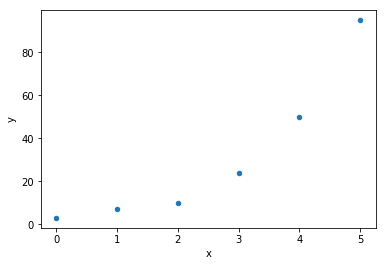

In [45]:
df = pd.DataFrame()
df['x'] = [0,1,2,3,4,5]
df['y'] = [3,7,10,24,50,95]

df.plot.scatter('x','y')

# Linear Fitting

The simplest regression fits a straight line to the data: y = mx + b.  The regression will then estimate two parameters: the intercept, and the slope of the line.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     18.70
Date:                Thu, 28 Mar 2019   Prob (F-statistic):             0.0124
Time:                        09:41:28   Log-Likelihood:                -24.178
No. Observations:                   6   AIC:                             52.36
Df Residuals:                       4   BIC:                             51.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5714     12.062     -0.959      0.3

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


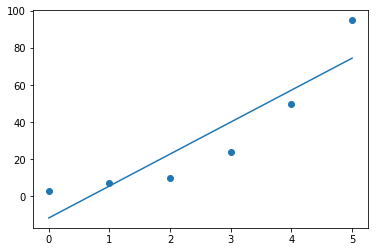

In [46]:
# First we specify the model, then fit the data.  The results object contains MANY features you many want for further analysis,
# including residuals, statistics about the fit, etc.  We'll use it to generate a report and then draw a best-fit line.
results = smf.ols(formula='y ~ x',data=df).fit()

# Print the report
print(results.summary())

# Plot the results
plt.scatter(df['x'],df['y'])
# And add a line using OLS results object
plt.plot(df['x'],results.predict(df['x']))

# Polynomial Fit

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     153.6
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           0.000951
Time:                        09:41:34   Log-Likelihood:                -15.470
No. Observations:                   6   AIC:                             36.94
Df Residuals:                       3   BIC:                             36.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1071      4.086      1.495      0.2

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


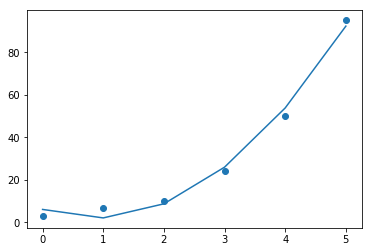

In [47]:
# The equation here is a bit different: the "I" term allows us to specify the math, since the model mini-language Patsy reserves
# symbols like "+" and "*" to do specific work.  They don't operate as you might expect! More information here, if you're 
# interested: https://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html.  This is a second order polynomial fit,
# but can be extended by adding more terms.

results = smf.ols(formula='y ~ x + I(x**2)',data=df).fit()

# Print the report
print(results.summary())

# Plot the results
plt.scatter(df['x'],df['y'])
# And add a line using OLS results object
plt.plot(df['x'],results.predict(df['x']))

# Exponential Fit

                            OLS Regression Results                            
Dep. Variable:              np.log(y)   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     568.4
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.84e-05
Time:                        09:46:11   Log-Likelihood:                 5.3959
No. Observations:                   6   AIC:                            -6.792
Df Residuals:                       4   BIC:                            -7.208
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1140      0.087     12.766      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


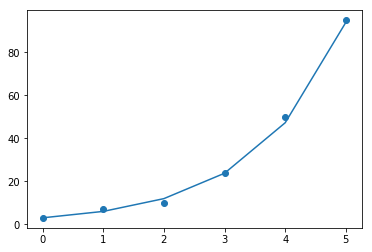

In [57]:
# To fit an exponential model, we take the log of the y-term, and fit our model to that.  See: 
# http://www.real-statistics.com/regression/exponential-regression-models/exponential-regression 
# for more information about the ideas behind doing this.  The 

results = smf.ols(formula='np.log(y) ~ x',data=df).fit()

# Print the report
print(results.summary())

# Plot the results
plt.scatter(df['x'],df['y'])
# The fit is a bit different, because we had to change the form of our equation (log(y) on the left)
fit_y = (results.params[0] * np.e) * np.e**(results.params[1] * df['x'])
plt.plot(df['x'],fit_y)

In [43]:
results.params[0]((np.e * results[0]) ** df['x'])

TypeError: 'RegressionResultsWrapper' object does not support indexing

In [56]:
(results.params[0] * np.e) * np.e**(results.params[1] * df['x'])

0     3.028104
1     6.019975
2    11.967920
3    23.792641
4    47.300596
5    94.035228
Name: x, dtype: float64